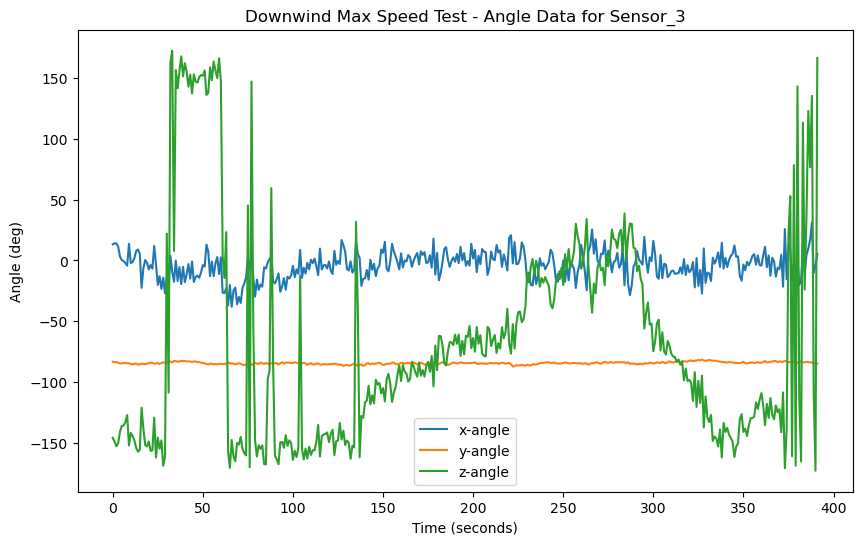

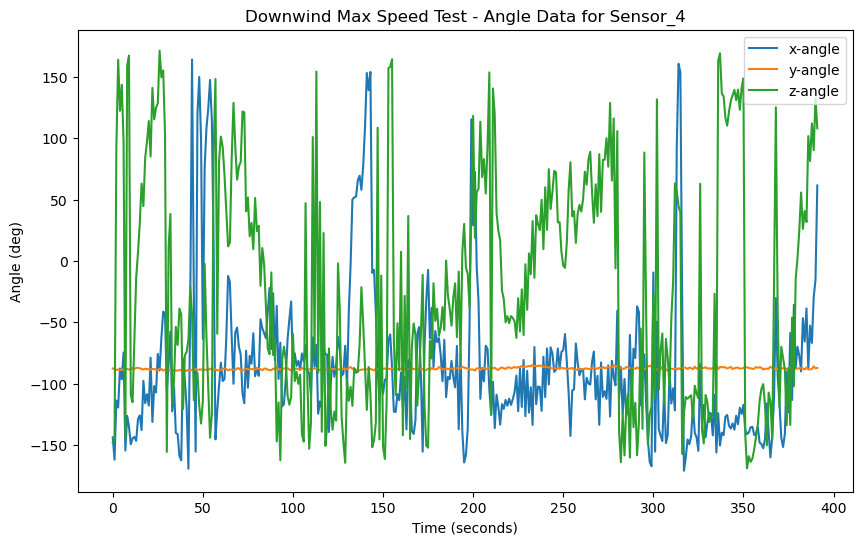

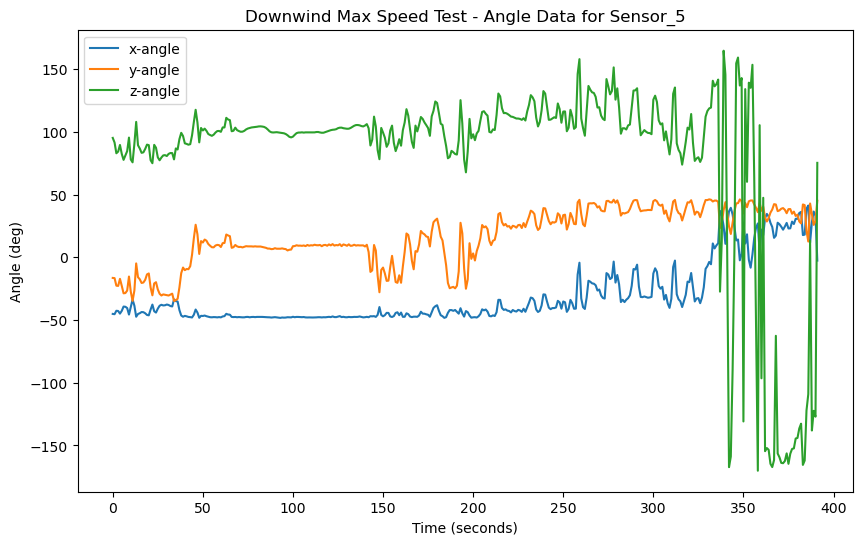

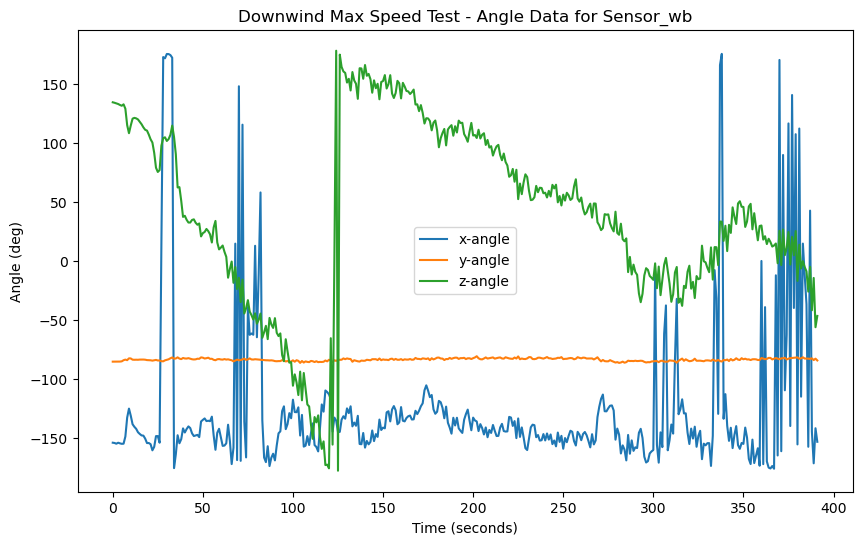

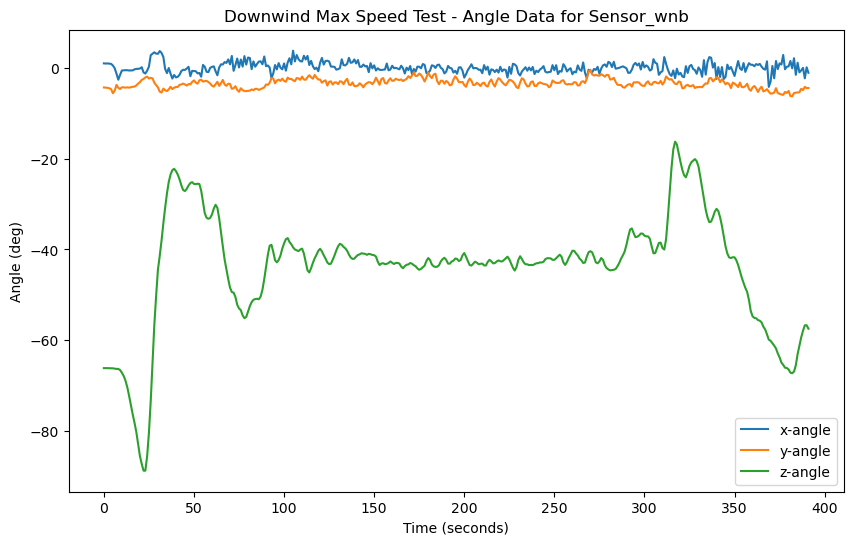

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to plot the angle data
def plot_angle_data(sensor_folder):
    """
    Plots the angle data for a given sensor folder.

    Args:
        sensor_folder: The path to the sensor folder.
    """
    # Get the list of angle files in the folder
    angle_files = [f for f in os.listdir(sensor_folder) if f.startswith('angle')]

    # Plot the angle data for each file
    for angle_file in angle_files:
        # Load the CSV file
        df = pd.read_csv(os.path.join(sensor_folder, angle_file))

        # Convert the 'time_from_sync' column to timedelta
        df['time_from_sync'] = pd.to_timedelta(df['time_from_sync'], unit='s')

        # Set the 'time_from_sync' column as the index
        df.set_index('time_from_sync', inplace=True)

        # Downsample the data to 1Hz
        df_downsampled = df.resample('1s').mean()

        # Calculate time from zero
        time_from_zero = df_downsampled.index.total_seconds() - df_downsampled.index.total_seconds().min()

        # Plot the downsampled data
        plt.figure(figsize=(10, 6))
        plt.plot(time_from_zero, df_downsampled['x'], label='x-angle')
        plt.plot(time_from_zero, df_downsampled['y'], label='y-angle')
        plt.plot(time_from_zero, df_downsampled['z'], label='z-angle')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Angle (deg)')
        plt.title(f'Downwind Max Speed Test - Angle Data for {sensor_folder}')
        plt.legend()
        plt.show()

# Get the list of sensor folders
sensor_folders = ['Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_wb', 'Sensor_wnb']

# Plot the angle data for each sensor folder
for sensor_folder in sensor_folders:
    plot_angle_data(sensor_folder)

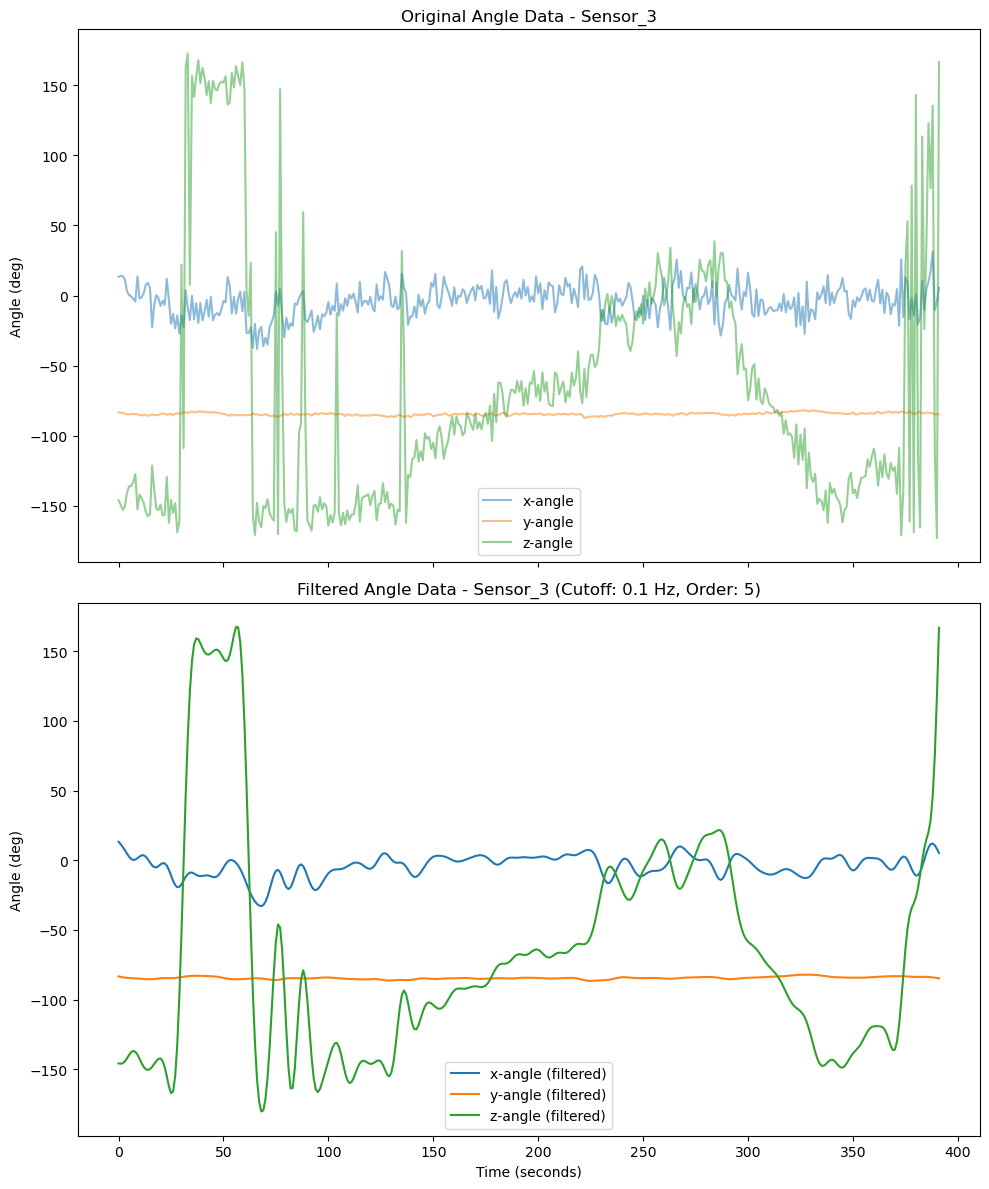

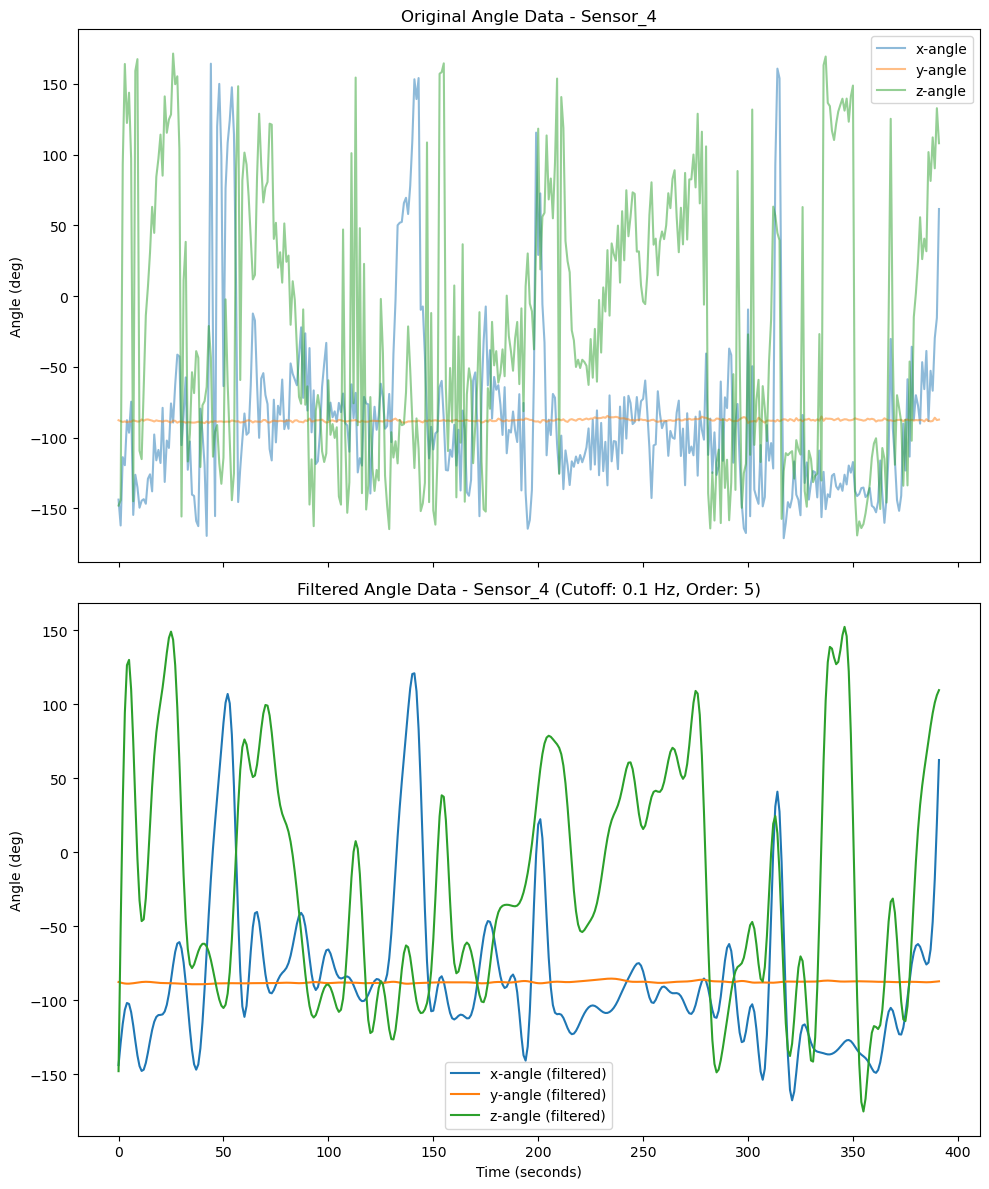

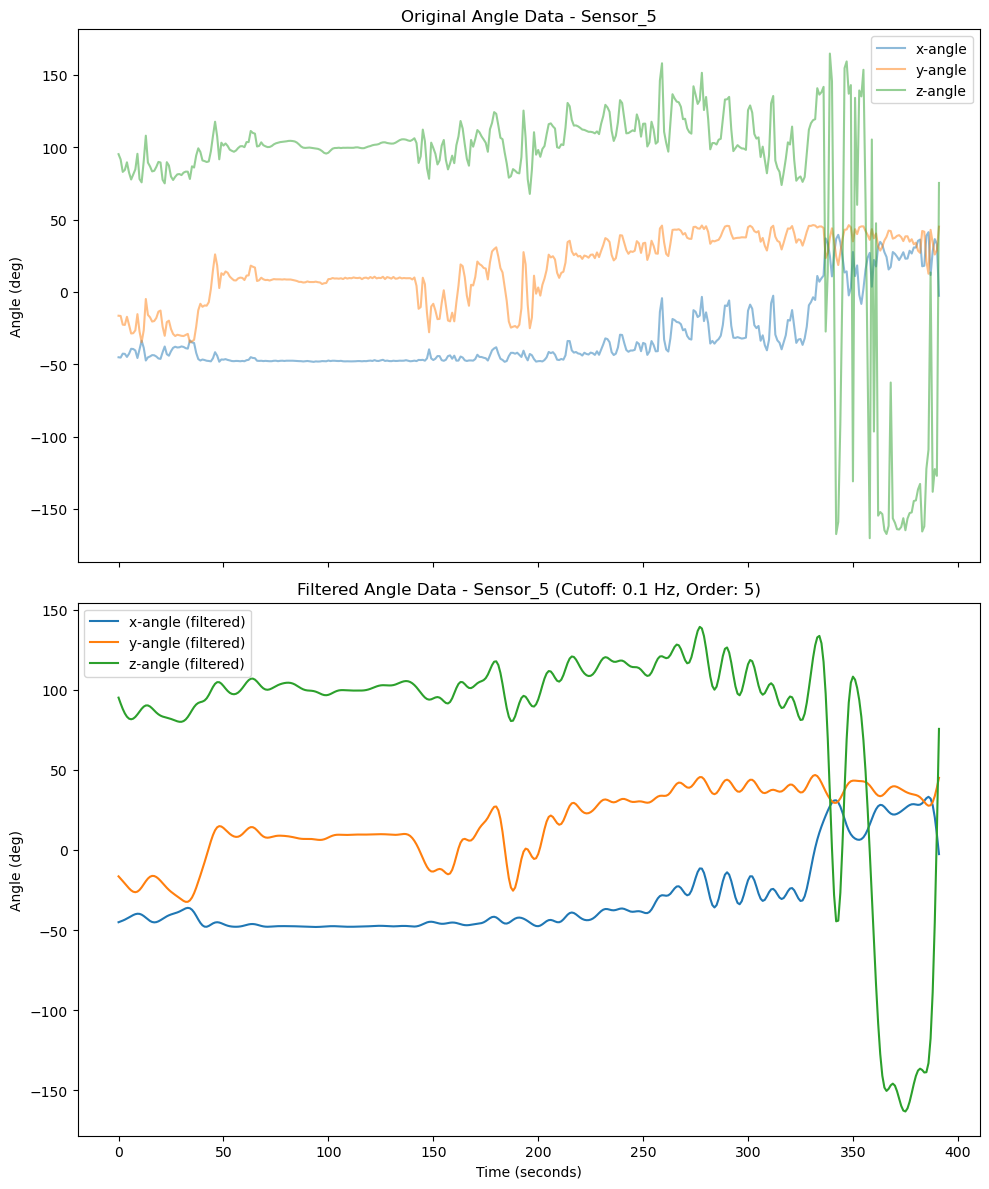

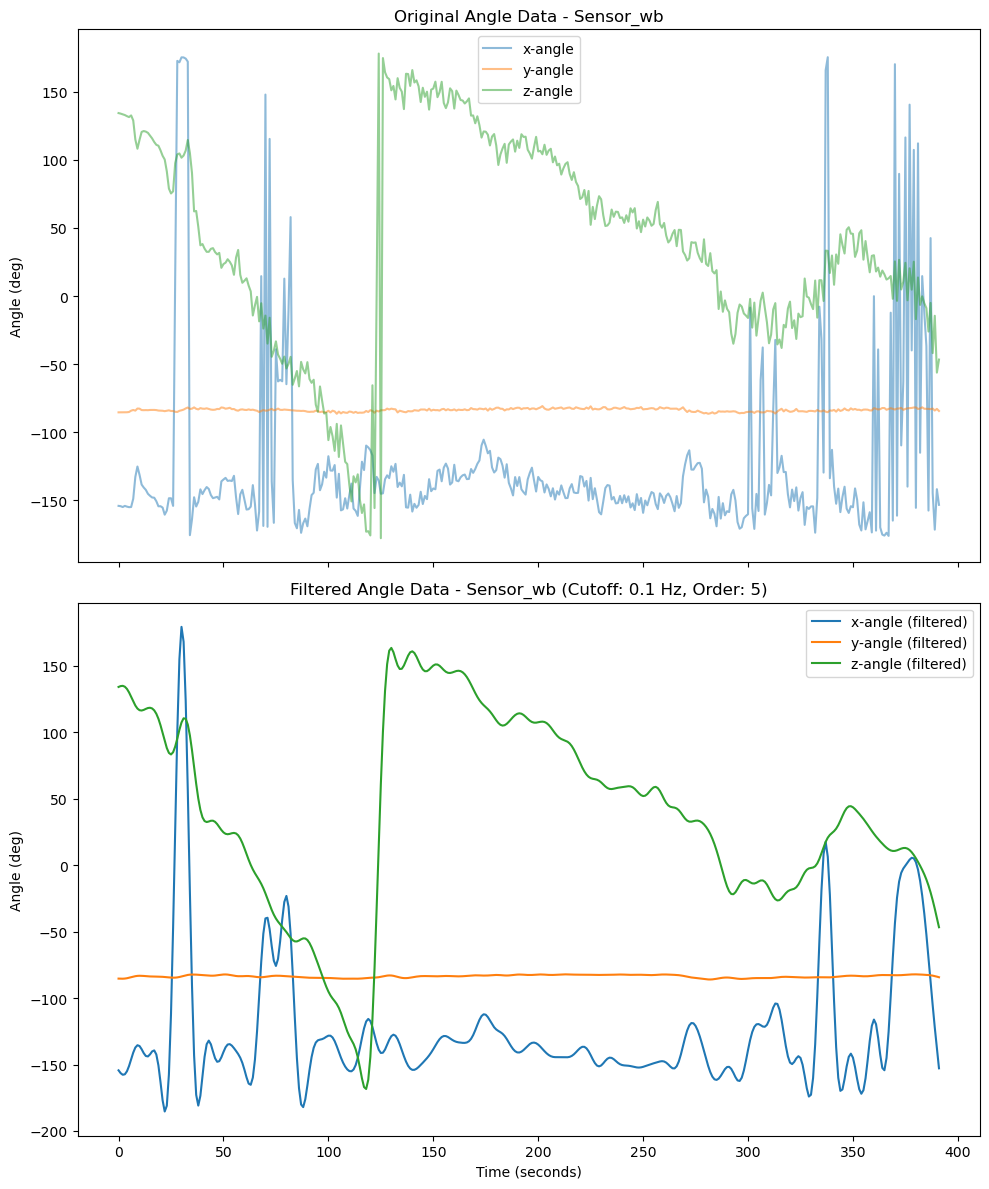

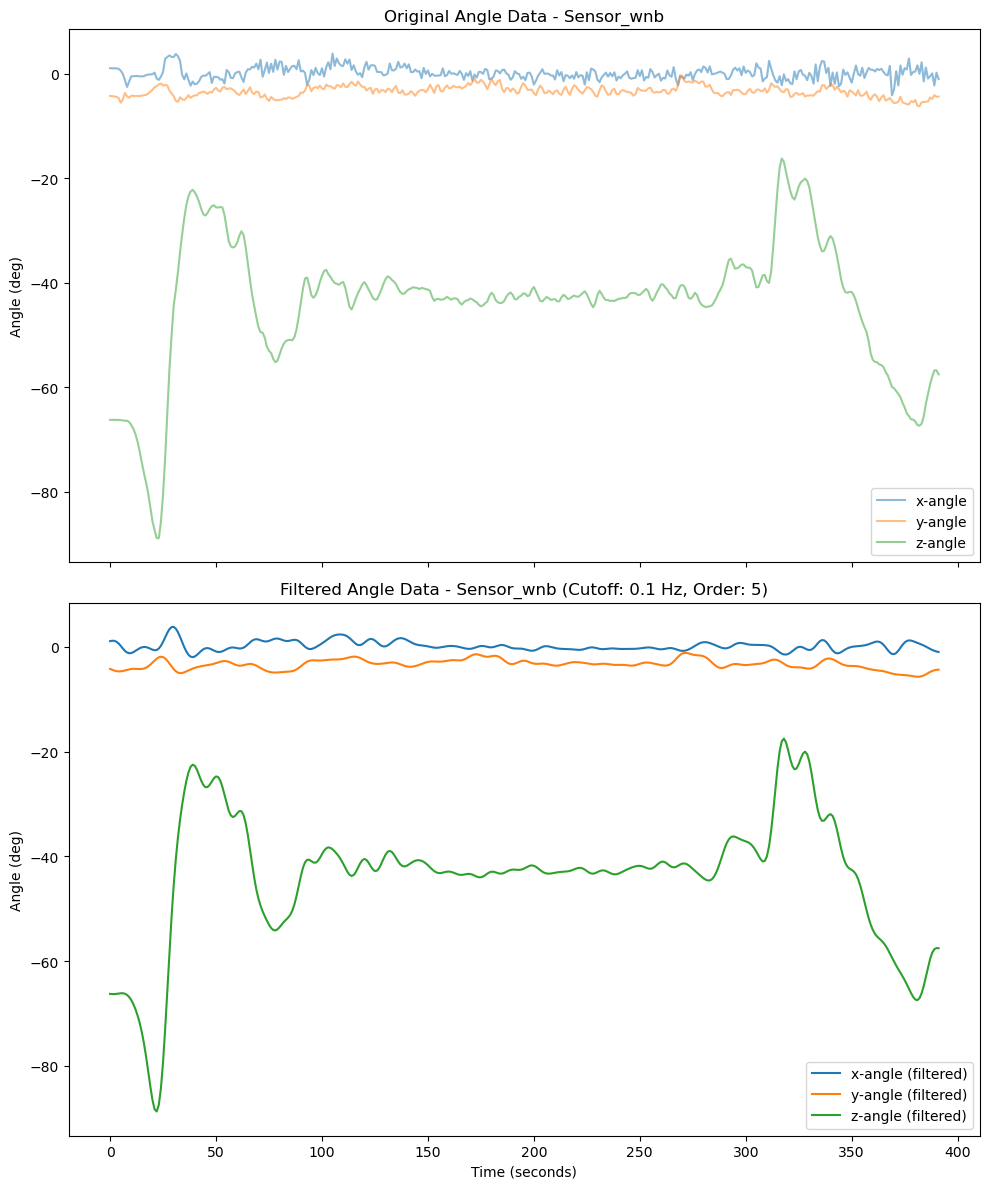

In [29]:
import scipy.signal as signal

# Function to plot the angle data with low pass filter
def plot_angle_data_with_filter(sensor_folder, cutoff_freq=0.1, order=5):
    """
    Plots the angle data for a given sensor folder with a low pass filter applied.

    Args:
        sensor_folder: The path to the sensor folder.
        cutoff_freq: The cutoff frequency for the low pass filter (default: 0.1 Hz).
        order: The order of the low pass filter (default: 5).
    """
    # Get the list of angle files in the folder
    angle_files = [f for f in os.listdir(sensor_folder) if f.startswith('angle')]

    # Plot the angle data for each file
    for angle_file in angle_files:
        # Load the CSV file
        df = pd.read_csv(os.path.join(sensor_folder, angle_file))

        # Convert the 'time_from_sync' column to timedelta
        df['time_from_sync'] = pd.to_timedelta(df['time_from_sync'], unit='s')

        # Set the 'time_from_sync' column as the index
        df.set_index('time_from_sync', inplace=True)

        # Downsample the data to 1Hz
        df_downsampled = df.resample('1s').mean()

        # Calculate time from zero
        time_from_zero = df_downsampled.index.total_seconds() - df_downsampled.index.total_seconds().min()

        # Design the low pass filter
        nyquist_freq = 0.5  # Nyquist frequency for 1 Hz sampling rate
        normal_cutoff = cutoff_freq / nyquist_freq
        b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

        # Apply the filter to each angle component
        filtered_x = signal.filtfilt(b, a, df_downsampled['x'])
        filtered_y = signal.filtfilt(b, a, df_downsampled['y'])
        filtered_z = signal.filtfilt(b, a, df_downsampled['z'])

        # Plot the original and filtered data
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

        # Original data
        ax1.plot(time_from_zero, df_downsampled['x'], label='x-angle', alpha=0.5)
        ax1.plot(time_from_zero, df_downsampled['y'], label='y-angle', alpha=0.5)
        ax1.plot(time_from_zero, df_downsampled['z'], label='z-angle', alpha=0.5)
        ax1.set_ylabel('Angle (deg)')
        ax1.set_title(f'Original Angle Data - {sensor_folder}')
        ax1.legend()

        # Filtered data
        ax2.plot(time_from_zero, filtered_x, label='x-angle (filtered)')
        ax2.plot(time_from_zero, filtered_y, label='y-angle (filtered)')
        ax2.plot(time_from_zero, filtered_z, label='z-angle (filtered)')
        ax2.set_xlabel('Time (seconds)')
        ax2.set_ylabel('Angle (deg)')
        ax2.set_title(f'Filtered Angle Data - {sensor_folder} (Cutoff: {cutoff_freq} Hz, Order: {order})')
        ax2.legend()

        plt.tight_layout()
        plt.show()

# Plot the angle data with low pass filter for each sensor folder
for sensor_folder in sensor_folders:
    plot_angle_data_with_filter(sensor_folder)


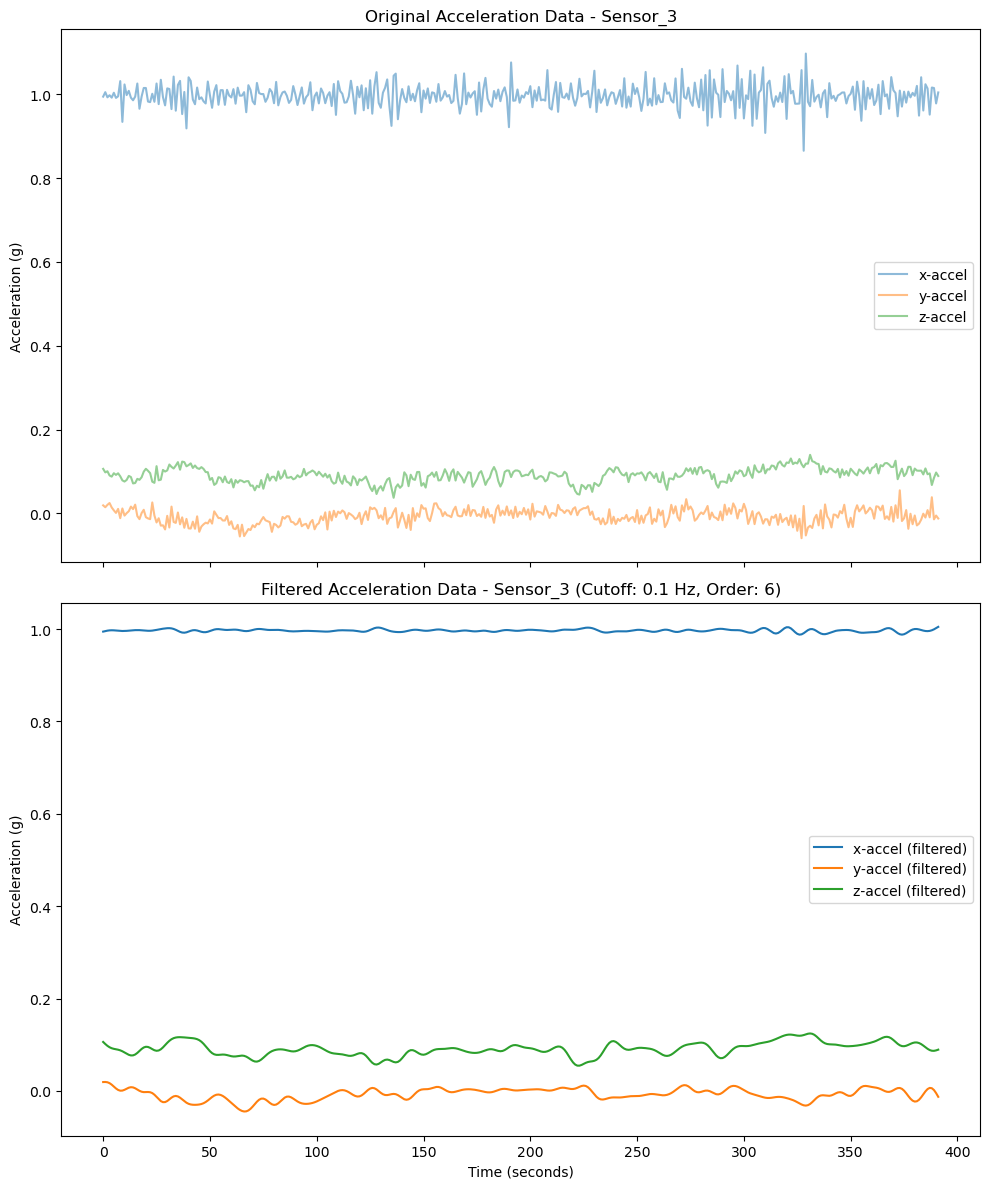

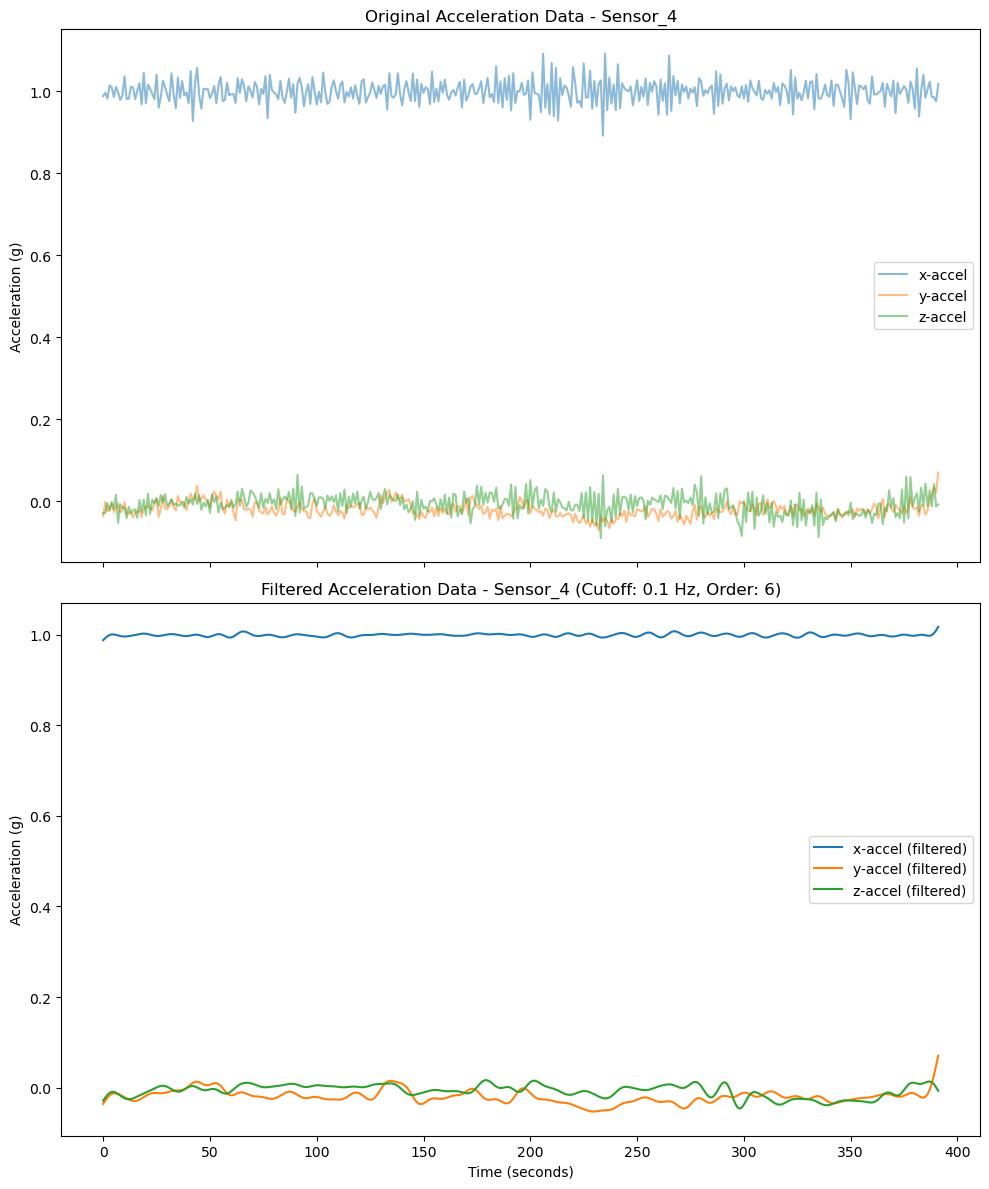

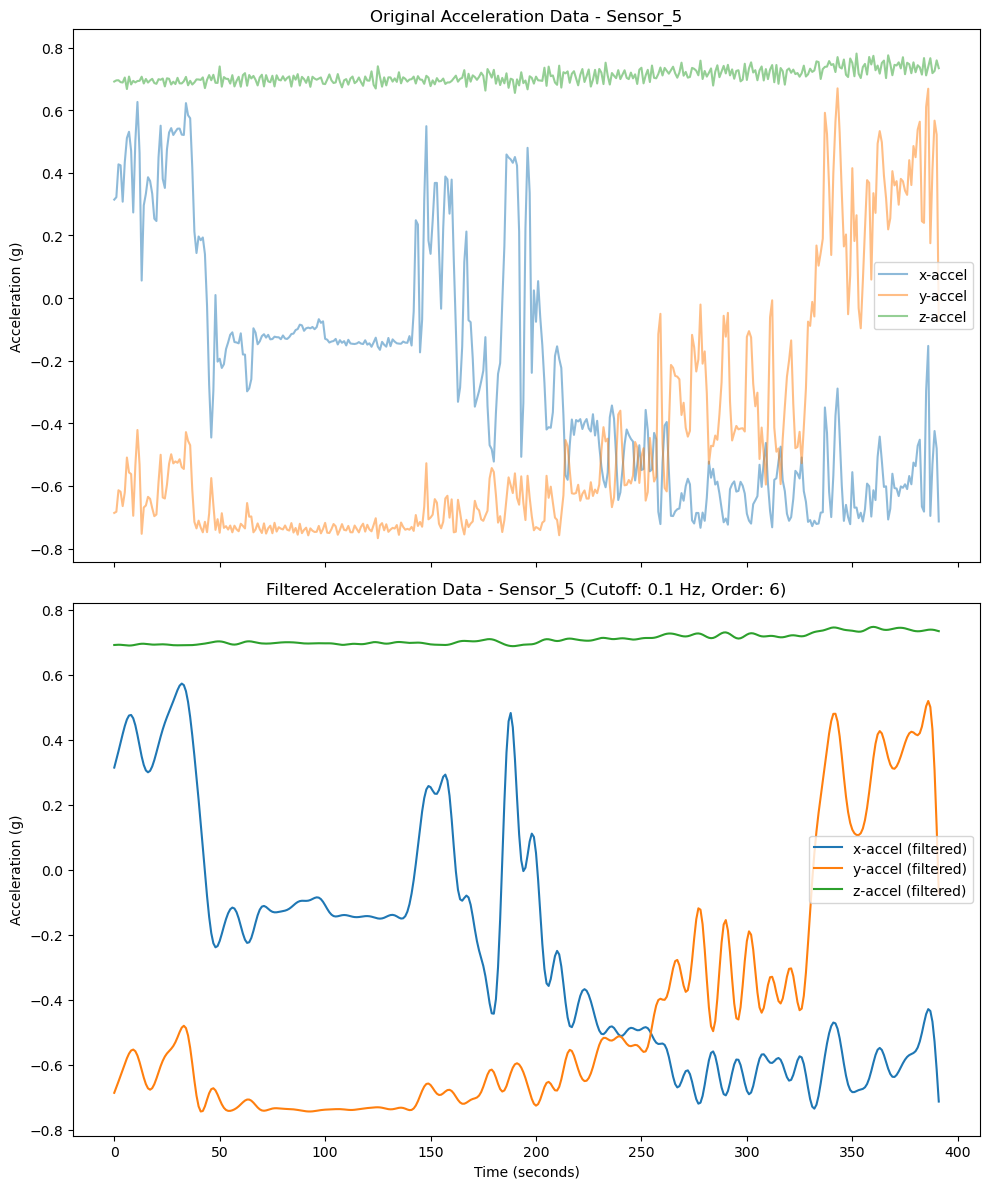

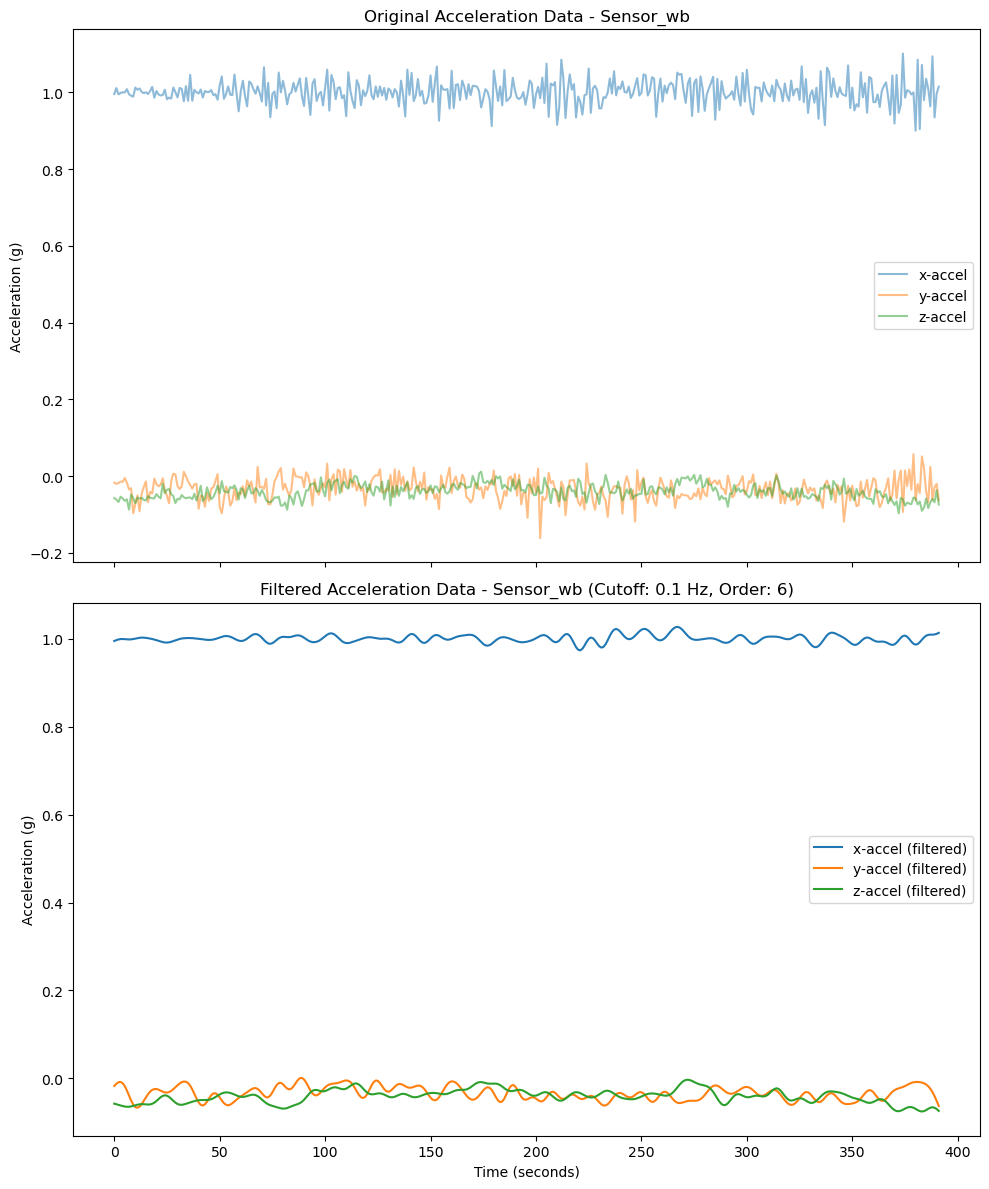

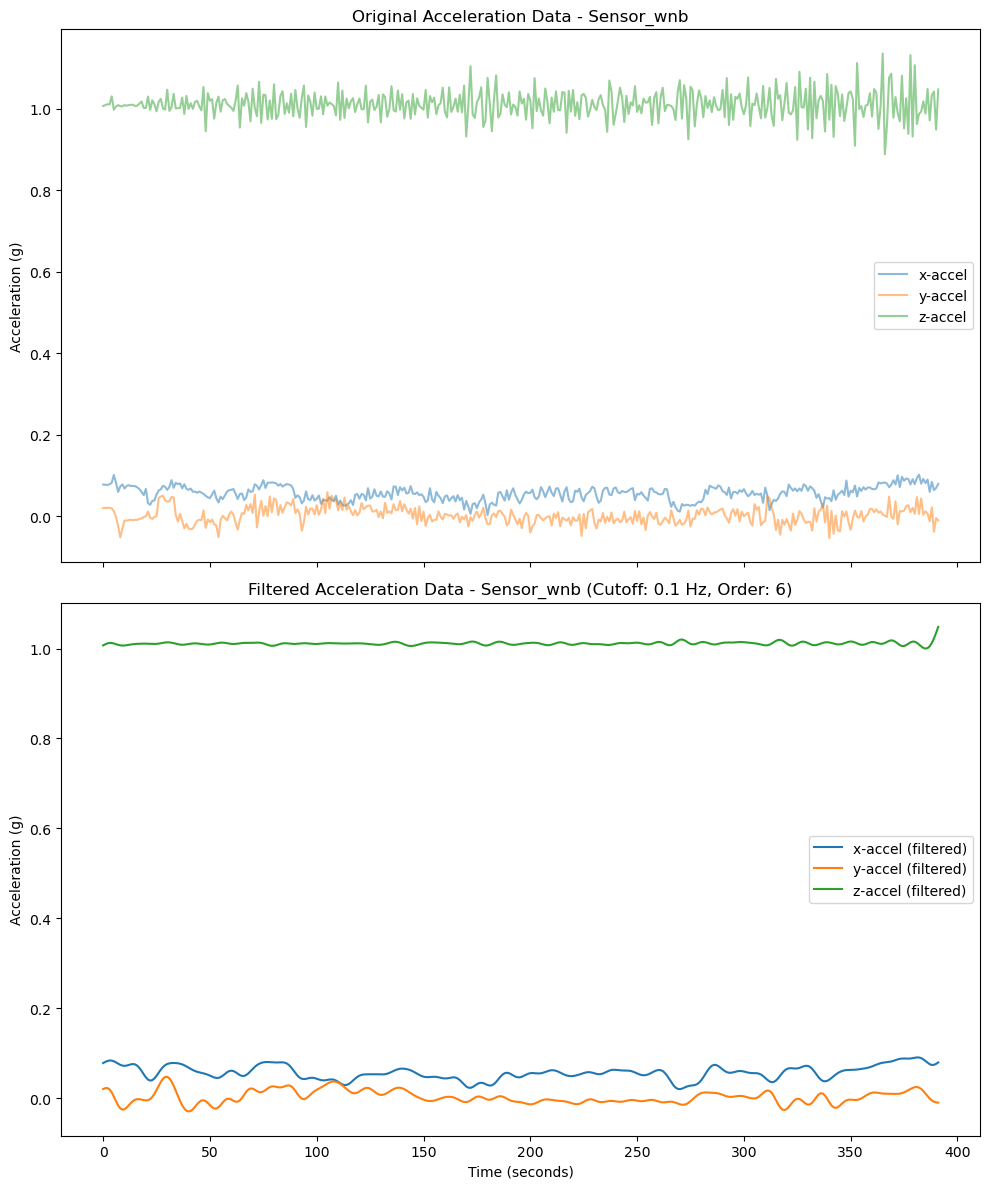

In [32]:
import glob
# Function to plot acceleration data with low pass filter
def plot_accel_data_with_filter(sensor_folder, cutoff_freq=0.1, order=6):
    # Read the acceleration data
    accel_file = glob.glob(os.path.join(sensor_folder, 'accel_*.csv'))[0]
    df = pd.read_csv(accel_file)

    # Convert 'time_from_sync' to timedelta and set it as index
    df['time_from_sync'] = pd.to_timedelta(df['time_from_sync'], unit='s')
    df.set_index('time_from_sync', inplace=True)

    # Downsample the data to 1Hz
    df_downsampled = df.resample('1s').mean()

    # Calculate time from zero
    time_from_zero = df_downsampled.index.total_seconds() - df_downsampled.index.total_seconds().min()

    # Design the low pass filter
    nyquist_freq = 0.5  # Nyquist frequency for 1 Hz sampling rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

    # Apply the filter to each acceleration component
    filtered_x = signal.filtfilt(b, a, df_downsampled['x'])
    filtered_y = signal.filtfilt(b, a, df_downsampled['y'])
    filtered_z = signal.filtfilt(b, a, df_downsampled['z'])

    # Plot the original and filtered data
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    # Original data
    ax1.plot(time_from_zero, df_downsampled['x'], label='x-accel', alpha=0.5)
    ax1.plot(time_from_zero, df_downsampled['y'], label='y-accel', alpha=0.5)
    ax1.plot(time_from_zero, df_downsampled['z'], label='z-accel', alpha=0.5)
    ax1.set_ylabel('Acceleration (g)')
    ax1.set_title(f'Original Acceleration Data - {sensor_folder}')
    ax1.legend()

    # Filtered data
    ax2.plot(time_from_zero, filtered_x, label='x-accel (filtered)')
    ax2.plot(time_from_zero, filtered_y, label='y-accel (filtered)')
    ax2.plot(time_from_zero, filtered_z, label='z-accel (filtered)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Acceleration (g)')
    ax2.set_title(f'Filtered Acceleration Data - {sensor_folder} (Cutoff: {cutoff_freq} Hz, Order: {order})')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot the acceleration data with low pass filter for each sensor folder
for sensor_folder in sensor_folders:
    plot_accel_data_with_filter(sensor_folder)


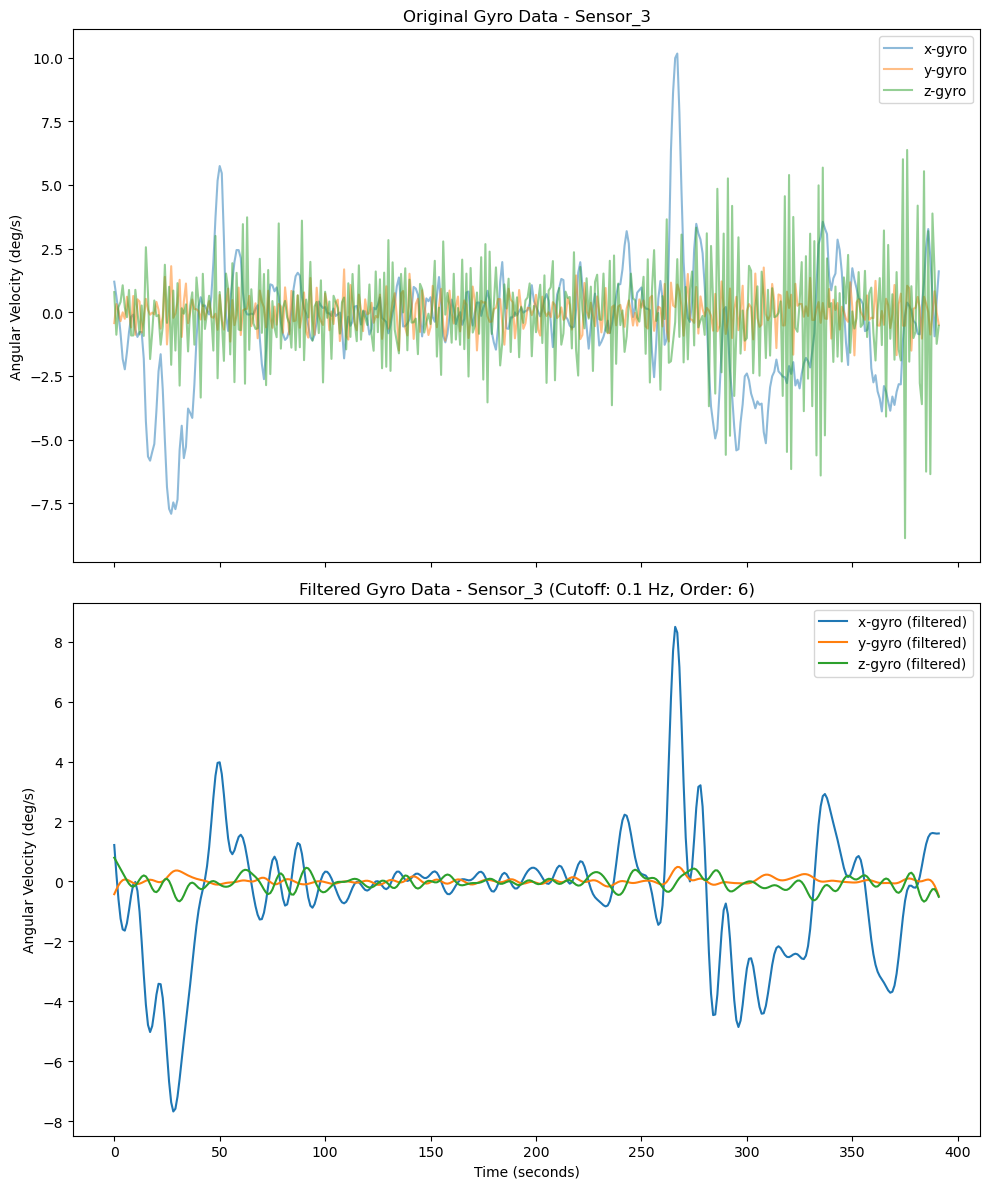

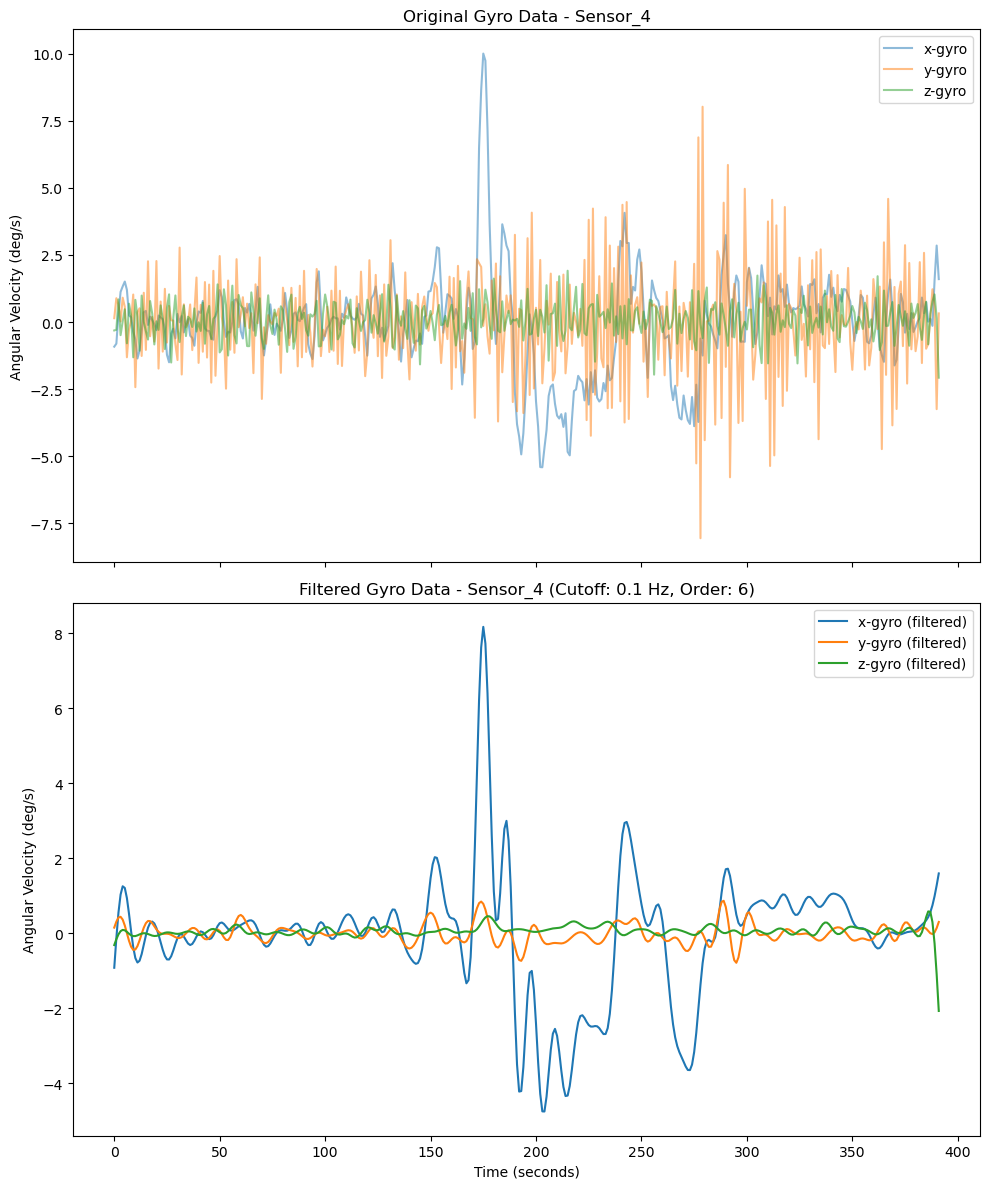

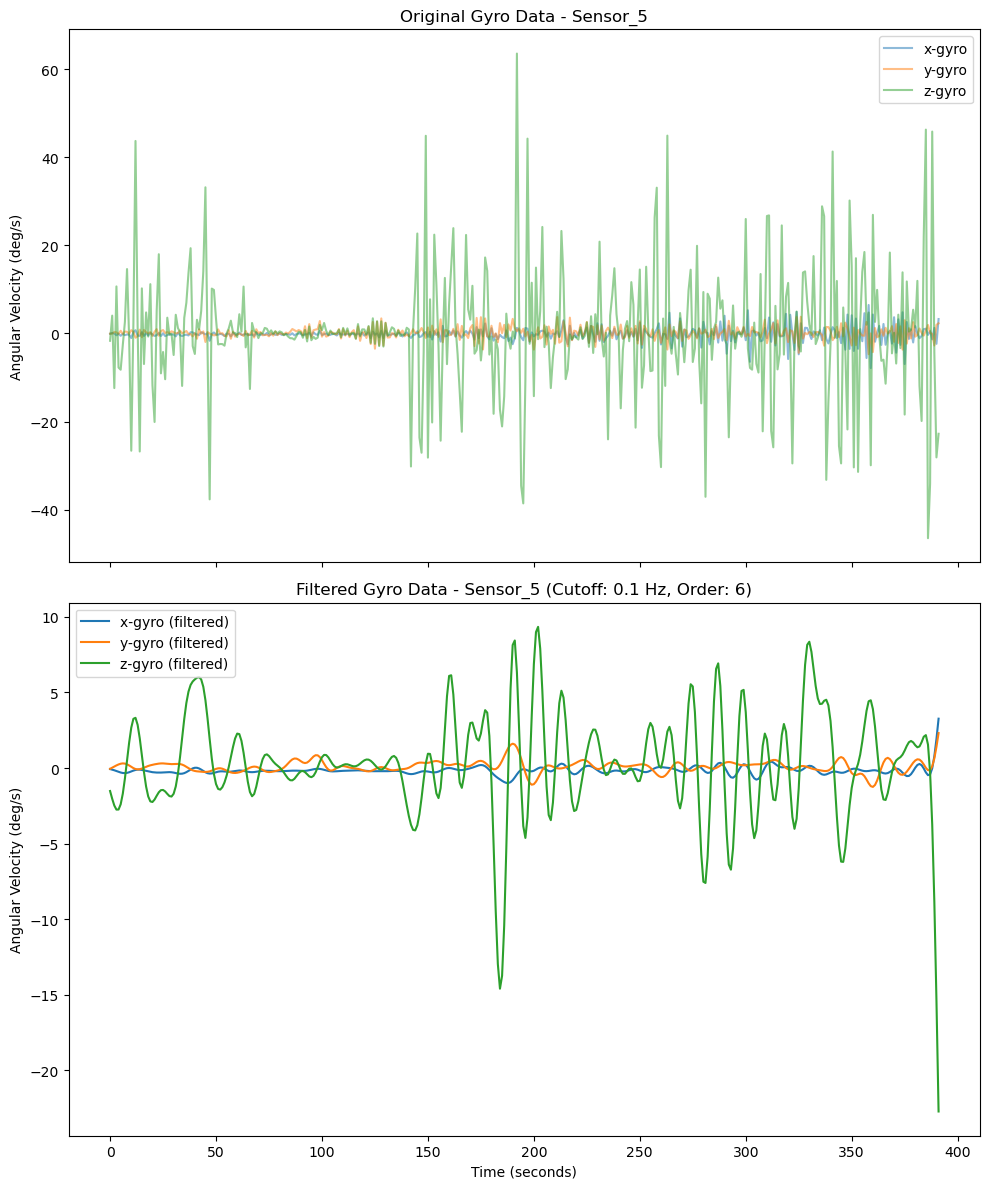

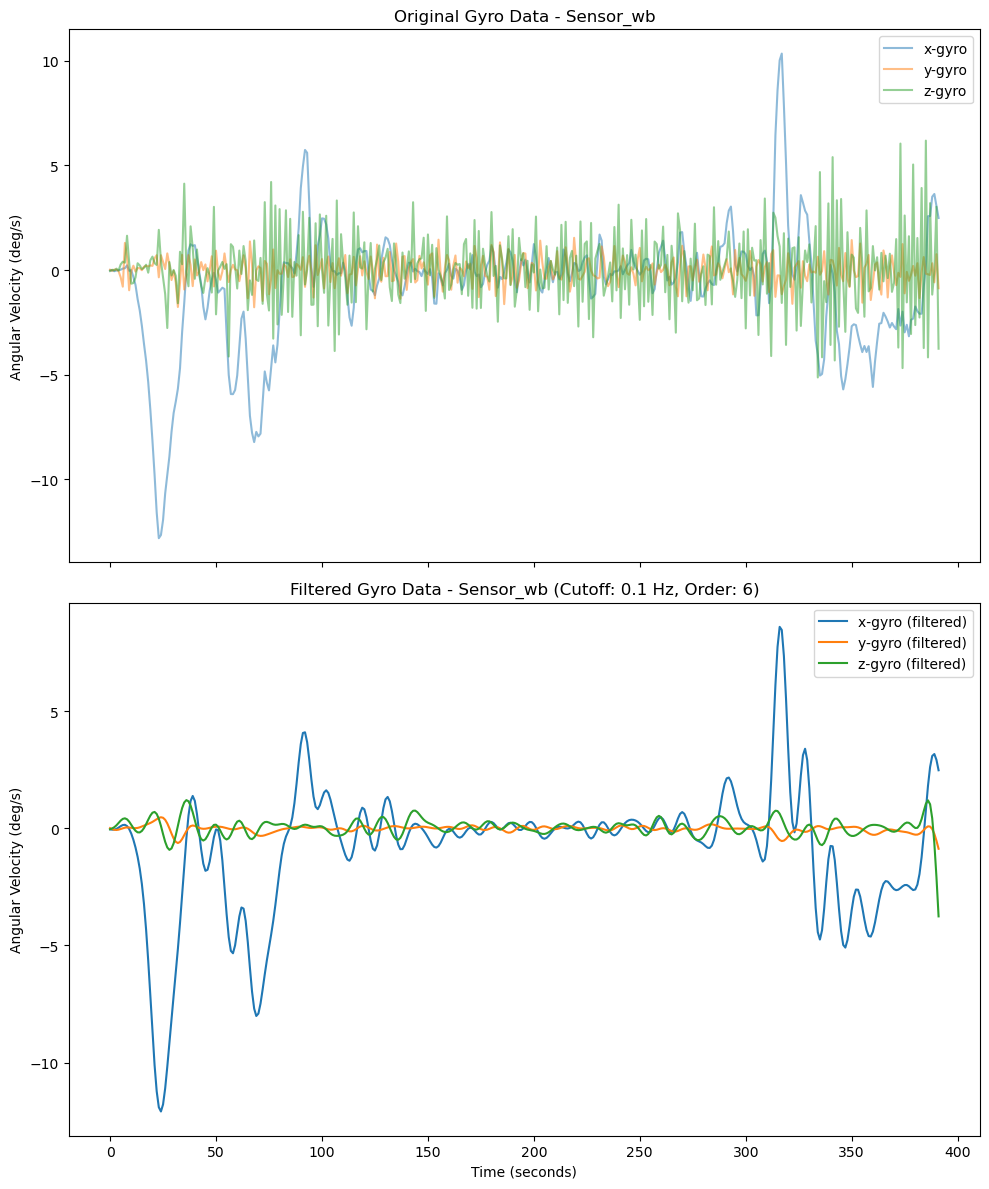

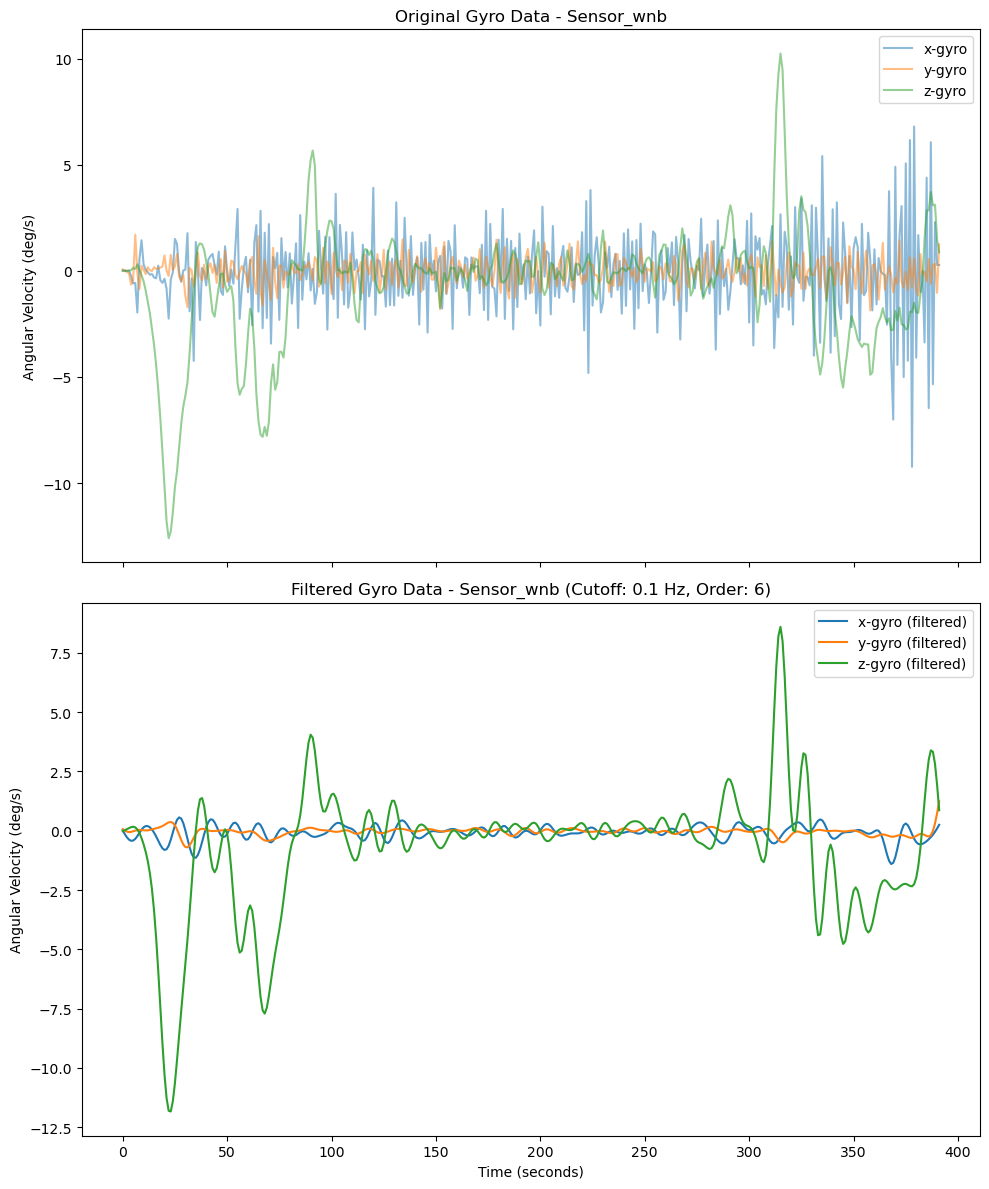

In [34]:
def plot_gyro_data_with_filter(sensor_folder, cutoff_freq=0.1, order=6):
    # Read the gyro data
    gyro_file = glob.glob(os.path.join(sensor_folder, 'gyro*.csv'))[0]
    df = pd.read_csv(gyro_file)

    # Convert time to timedelta and set as index
    df['time_from_sync'] = pd.to_timedelta(df['time_from_sync'], unit='s')
    df.set_index('time_from_sync', inplace=True)

    # Downsample the data to 1Hz
    df_downsampled = df.resample('1s').mean()

    # Calculate time from zero
    time_from_zero = df_downsampled.index.total_seconds() - df_downsampled.index.total_seconds().min()

    # Design the low pass filter
    nyquist_freq = 0.5  # Nyquist frequency for 1 Hz sampling rate
    normal_cutoff = cutoff_freq / nyquist_freq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)

    # Apply the filter to each gyro component
    filtered_x = signal.filtfilt(b, a, df_downsampled['x'])
    filtered_y = signal.filtfilt(b, a, df_downsampled['y'])
    filtered_z = signal.filtfilt(b, a, df_downsampled['z'])

    # Plot the original and filtered data
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

    # Original data
    ax1.plot(time_from_zero, df_downsampled['x'], label='x-gyro', alpha=0.5)
    ax1.plot(time_from_zero, df_downsampled['y'], label='y-gyro', alpha=0.5)
    ax1.plot(time_from_zero, df_downsampled['z'], label='z-gyro', alpha=0.5)
    ax1.set_ylabel('Angular Velocity (deg/s)')
    ax1.set_title(f'Original Gyro Data - {sensor_folder}')
    ax1.legend()

    # Filtered data
    ax2.plot(time_from_zero, filtered_x, label='x-gyro (filtered)')
    ax2.plot(time_from_zero, filtered_y, label='y-gyro (filtered)')
    ax2.plot(time_from_zero, filtered_z, label='z-gyro (filtered)')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Angular Velocity (deg/s)')
    ax2.set_title(f'Filtered Gyro Data - {sensor_folder} (Cutoff: {cutoff_freq} Hz, Order: {order})')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot the gyro data with low pass filter for each sensor folder
for sensor_folder in sensor_folders:
    plot_gyro_data_with_filter(sensor_folder)


In [59]:
import pandas as pd
import folium
from folium import plugins
import os
import glob
import math

def plot_gps_path(gps_file, wind_direction=None, wind_speed=None):
    # Load the CSV file
    df = pd.read_csv(gps_file)
    
    # Extract required columns
    df = df[['Lat', 'Lng', 'time_from_sync', 'Bearing', 'SpeedKPH']]
    
    # Sort by time_from_sync to ensure correct path order
    df = df.sort_values('time_from_sync')
    
    # Create a map centered on the mean coordinates
    m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=14)
    
    # Create a PolyLine of the path
    coordinates = df[['Lat', 'Lng']].values.tolist()
    folium.PolyLine(coordinates, weight=2, color='blue', opacity=0.8).add_to(m)
    
    # Add start and end markers
    folium.Marker(
        location=coordinates[0],
        popup='Start',
        icon=folium.Icon(color='green', icon='play')
    ).add_to(m)
    
    folium.Marker(
        location=coordinates[-1],
        popup='End',
        icon=folium.Icon(color='red', icon='stop')
    ).add_to(m)
    
    # Add arrows indicating bearing and speed every 10 points
    for i in range(0, len(df), 5):
        lat, lng = df.iloc[i]['Lat'], df.iloc[i]['Lng']
        bearing = df.iloc[i]['Bearing']
        speed = df.iloc[i]['SpeedKPH']
        
        # Calculate arrow endpoint based on speed and bearing
        arrow_length = speed * 0.0001  # Adjust this factor to scale arrow length
        end_lat = lat + arrow_length * math.cos(math.radians(bearing))
        end_lng = lng + arrow_length * math.sin(math.radians(bearing))
        
        folium.PolyLine(
            locations=[[lat, lng], [end_lat, end_lng]],
            color='red',
            weight=2,
            opacity=0.8,
            popup=f"Speed: {speed:.2f} km/h, Bearing: {bearing:.2f}°"
        ).add_to(m)
        
        # Add arrowhead
        folium.RegularPolygonMarker(
            location=[end_lat, end_lng],
            number_of_sides=3,
            rotation=bearing,
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.8
        ).add_to(m)
    
    # Add wind direction and speed marker if provided
    if wind_direction is not None and wind_speed is not None:
        # Adjust wind direction by 180 degrees
        adjusted_wind_direction = (wind_direction + 180) % 360
        wind_marker = folium.Marker(
            location=[df['Lat'].mean(), df['Lng'].mean()],
            icon=folium.Icon(color='blue', icon='arrow-up', prefix='fa', angle=adjusted_wind_direction),
            popup=f'Wind Direction: {wind_direction}°, Wind Speed: {wind_speed} km/h'
        )
        wind_marker.add_to(m)
    
    # Add fullscreen option
    plugins.Fullscreen().add_to(m)
    
    # Save the map
    m.save(f'gps_map_{os.path.basename(gps_file)}.html')

# Search for GPS CSV files
gps_files = glob.glob('**/GPS*.csv', recursive=True)

# Plot GPS path for each found file
for gps_file in gps_files:
    # You can now call plot_gps_path with or without wind data
    # Example with wind data:
    plot_gps_path(gps_file, wind_direction=229, wind_speed=21)
    # Example without wind data:
    # plot_gps_path(gps_file)

print(f"GPS maps have been created and saved for {len(gps_files)} files.")


GPS maps have been created and saved for 2 files.


In [62]:
import pandas as pd
import folium
from folium import plugins
import os
import glob
import math

def plot_gps_path(gps_file, wind_direction=None, wind_speed=None):
    # Load the CSV file
    df = pd.read_csv(gps_file)

    # Extract required columns
    df = df[['Lat', 'Lng', 'time_from_sync', 'Bearing', 'SpeedKPH']]

    # Sort by time_from_sync to ensure correct path order
    df = df.sort_values('time_from_sync')

    # Create a map centered on the mean coordinates
    m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=14)

    # Create a PolyLine of the path
    coordinates = df[['Lat', 'Lng']].values.tolist()
    folium.PolyLine(coordinates, weight=2, color='blue', opacity=0.8).add_to(m)

    # Add start and end markers
    folium.Marker(
        location=coordinates[0],
        popup='Start',
        icon=folium.Icon(color='green', icon='play')
    ).add_to(m)

    folium.Marker(
        location=coordinates[-1],
        popup='End',
        icon=folium.Icon(color='red', icon='stop')
    ).add_to(m)

    # Add arrows indicating bearing and speed every 5 points
    for i in range(0, len(df), 5):
        lat, lng = df.iloc[i]['Lat'], df.iloc[i]['Lng']
        bearing = df.iloc[i]['Bearing']
        speed = df.iloc[i]['SpeedKPH']
        
        # Calculate arrow endpoint based on speed and bearing
        arrow_length = speed * 0.0001  # Adjust this factor to scale arrow length
        end_lat = lat + arrow_length * math.cos(math.radians(bearing))
        end_lng = lng + arrow_length * math.sin(math.radians(bearing))
        
        folium.PolyLine(
            locations=[[lat, lng], [end_lat, end_lng]],
            color='red',
            weight=2,
            opacity=0.8,
            popup=f"Speed: {speed:.2f} km/h, Bearing: {bearing:.2f}°"
        ).add_to(m)
        
        # Add arrowhead
        folium.RegularPolygonMarker(
            location=[end_lat, end_lng],
            number_of_sides=3,
            rotation=bearing,
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.8
        ).add_to(m)
        
        # Add wind vector arrow if wind data is provided
        if wind_direction is not None and wind_speed is not None:
            # Calculate combined vector
            wind_rad = math.radians(wind_direction)
            combined_x = math.cos(math.radians(bearing)) - math.cos(wind_rad)
            combined_y = math.sin(math.radians(bearing)) - math.sin(wind_rad)
            combined_angle = math.degrees(math.atan2(combined_y, combined_x))
            
            # Calculate endpoint for combined vector
            combined_length = arrow_length * 1.5  # Adjust this factor as needed
            combined_end_lat = lat + combined_length * math.cos(math.radians(combined_angle))
            combined_end_lng = lng + combined_length * math.sin(math.radians(combined_angle))
            
            # Add combined vector arrow
            folium.PolyLine(
                locations=[[lat, lng], [combined_end_lat, combined_end_lng]],
                color='purple',
                weight=2,
                opacity=0.8,
                popup=f"Combined Vector: {combined_angle:.2f}°"
            ).add_to(m)
            
            # Add arrowhead for combined vector
            folium.RegularPolygonMarker(
                location=[combined_end_lat, combined_end_lng],
                number_of_sides=3,
                rotation=combined_angle,
                radius=3,
                color='purple',
                fill=True,
                fill_color='purple',
                fill_opacity=0.8
            ).add_to(m)

    # Add wind direction and speed marker if provided
    if wind_direction is not None and wind_speed is not None:
        # Adjust wind direction by 180 degrees
        adjusted_wind_direction = (wind_direction + 180) % 360
        wind_marker = folium.Marker(
            location=[df['Lat'].mean(), df['Lng'].mean()],
            icon=folium.Icon(color='blue', icon='arrow-up', prefix='fa', angle=adjusted_wind_direction),
            popup=f'Wind Direction: {wind_direction}°, Wind Speed: {wind_speed} km/h'
        )
        wind_marker.add_to(m)

    # Add fullscreen option
    plugins.Fullscreen().add_to(m)

    # Save the map
    m.save(f'gps_map_{os.path.basename(gps_file)}.html')

# Search for GPS CSV files
gps_files = glob.glob('**/GPS*.csv', recursive=True)

# Plot GPS path for each found file
for gps_file in gps_files:
    # You can now call plot_gps_path with or without wind data
    # Example with wind data:
    plot_gps_path(gps_file, wind_direction=229, wind_speed=21)
    # Example without wind data:
    # plot_gps_path(gps_file)

print(f"GPS maps have been created and saved for {len(gps_files)} files.")


GPS maps have been created and saved for 2 files.


In [82]:
import pandas as pd
import folium
from folium import plugins
import os
import glob
import math

def plot_gps_path(gps_file, wind_direction=None, wind_speed=None):
    # Load the CSV file
    df = pd.read_csv(gps_file)

    # Extract required columns
    df = df[['Lat', 'Lng', 'time_from_sync', 'Bearing', 'SpeedKPH']]

    # Sort by time_from_sync to ensure correct path order
    df = df.sort_values('time_from_sync')

    # Create a map centered on the mean coordinates
    m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=14)

    # Create a PolyLine of the path
    coordinates = df[['Lat', 'Lng']].values.tolist()
    folium.PolyLine(coordinates, weight=2, color='blue', opacity=0.8).add_to(m)

    # Add start and end markers
    folium.Marker(
        location=coordinates[0],
        popup='Start',
        icon=folium.Icon(color='green', icon='play')
    ).add_to(m)

    folium.Marker(
        location=coordinates[-1],
        popup='End',
        icon=folium.Icon(color='red', icon='stop')
    ).add_to(m)

    # Add arrows indicating bearing and speed every 5 points
    for i in range(0, len(df), 5):
        lat, lng = df.iloc[i]['Lat'], df.iloc[i]['Lng']
        bearing = df.iloc[i]['Bearing']
        speed = df.iloc[i]['SpeedKPH']

        # Calculate arrow endpoint based on speed and bearing
        arrow_length = speed * 0.00005  # Adjust this factor to scale arrow length
        end_lat = lat + arrow_length * math.cos(math.radians(bearing))
        end_lng = lng + arrow_length * math.sin(math.radians(bearing))

        # Draw bearing vector
        folium.PolyLine(
            locations=[[lat, lng], [end_lat, end_lng]],
            color='red',
            weight=2,
            opacity=0.8,
            popup=f"Speed: {speed:.2f} km/h, Bearing: {bearing:.2f}°"
        ).add_to(m)

        # Add arrowhead for bearing vector
        folium.RegularPolygonMarker(
            location=[end_lat, end_lng],
            number_of_sides=3,
            rotation=bearing+30,
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.8
        ).add_to(m)

        # Add wind vector arrow if wind data is provided
        if wind_direction is not None and wind_speed is not None:
            # Calculate wind vector endpoint
            wind_length = wind_speed * 0.00002  # Adjust this factor to scale wind arrow length
            wind_rad = math.radians(wind_direction)
            wind_end_lat = end_lat - wind_length * math.cos(wind_rad)
            wind_end_lng = end_lng - wind_length * math.sin(wind_rad)

    # Add fullscreen option
    plugins.Fullscreen().add_to(m)

    # Save the map
    m.save(f'gps_map_{os.path.basename(gps_file)}.html')

# Search for GPS CSV files
gps_files = glob.glob('**/GPS*.csv', recursive=True)

# Plot GPS path for each found file
for gps_file in gps_files:
    # You can now call plot_gps_path with or without wind data
    # Example with wind data:
    plot_gps_path(gps_file, wind_direction=229, wind_speed=21)
    # Example without wind data:
    # plot_gps_path(gps_file)

print(f"GPS maps have been created and saved for {len(gps_files)} files.")


GPS maps have been created and saved for 2 files.


In [85]:
import pandas as pd
import folium
from folium import plugins
import os
import glob
import math

def plot_gps_path(gps_file, wind_direction=None, wind_speed=None):
    # Load the CSV file
    df = pd.read_csv(gps_file)

    # Extract required columns
    df = df[['Lat', 'Lng', 'time_from_sync', 'Bearing', 'SpeedKPH']]

    # Sort by time_from_sync to ensure correct path order
    df = df.sort_values('time_from_sync')

    # Create a map centered on the mean coordinates
    m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=14)

    # Create a PolyLine of the path
    coordinates = df[['Lat', 'Lng']].values.tolist()
    folium.PolyLine(coordinates, weight=2, color='blue', opacity=0.8).add_to(m)

    # Add start and end markers
    folium.Marker(
        location=coordinates[0],
        popup='Start',
        icon=folium.Icon(color='green', icon='play')
    ).add_to(m)

    folium.Marker(
        location=coordinates[-1],
        popup='End',
        icon=folium.Icon(color='red', icon='stop')
    ).add_to(m)

    # Add arrows indicating bearing and speed every 5 points
    for i in range(0, len(df), 5):
        lat, lng = df.iloc[i]['Lat'], df.iloc[i]['Lng']
        bearing = df.iloc[i]['Bearing']
        speed = df.iloc[i]['SpeedKPH']

        # Calculate arrow endpoint based on speed and bearing
        arrow_length = speed * 0.0001  # Adjust this factor to scale arrow length
        end_lat = lat + arrow_length * math.cos(math.radians(bearing))
        end_lng = lng + arrow_length * math.sin(math.radians(bearing))

        # Draw bearing vector
        folium.PolyLine(
            locations=[[lat, lng], [end_lat, end_lng]],
            color='red',
            weight=2,
            opacity=0.8,
            popup=f"Speed: {speed:.2f} km/h, Bearing: {bearing:.2f}°"
        ).add_to(m)

        # Add arrowhead for bearing vector
        folium.RegularPolygonMarker(
            location=[end_lat, end_lng],
            number_of_sides=3,
            rotation=bearing+30,
            radius=3,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.8
        ).add_to(m)



    # Add wind direction and speed marker if provided
    if wind_direction is not None and wind_speed is not None:
        # Adjust wind direction by 180 degrees
        adjusted_wind_direction = (wind_direction + 180) % 360
        wind_marker = folium.Marker(
            location=[df['Lat'].mean(), df['Lng'].mean()],
            icon=folium.Icon(color='blue', icon='arrow-up', prefix='fa', angle=adjusted_wind_direction),
            popup=f'Wind Direction: {wind_direction}°, Wind Speed: {wind_speed} km/h'
        )
        wind_marker.add_to(m)

    # Add fullscreen option
    plugins.Fullscreen().add_to(m)

    # Save the map
    m.save(f'gps_map_{os.path.basename(gps_file)}.html')

# Search for GPS CSV files
gps_files = glob.glob('**/GPS*.csv', recursive=True)

# Plot GPS path for each found file
for gps_file in gps_files:
    # You can now call plot_gps_path with or without wind data
    # Example with wind data:
    plot_gps_path(gps_file, wind_direction=229, wind_speed=21)
    # Example without wind data:
    # plot_gps_path(gps_file)

print(f"GPS maps have been created and saved for {len(gps_files)} files.")


GPS maps have been created and saved for 2 files.


       time_from_sync   Speed_kts
count      181.000000  181.000000
mean      3320.999326   27.800089
std         52.393957    4.927552
min       3231.000000   15.415772
25%       3276.000000   26.155517
50%       3320.999000   28.466533
75%       3365.999000   31.614482
max       3410.999000   34.886622


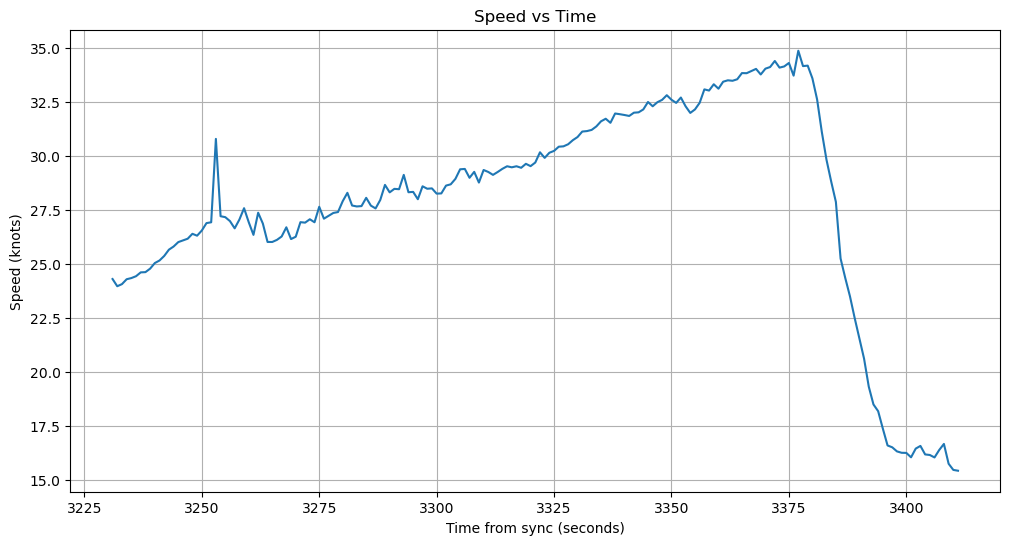

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


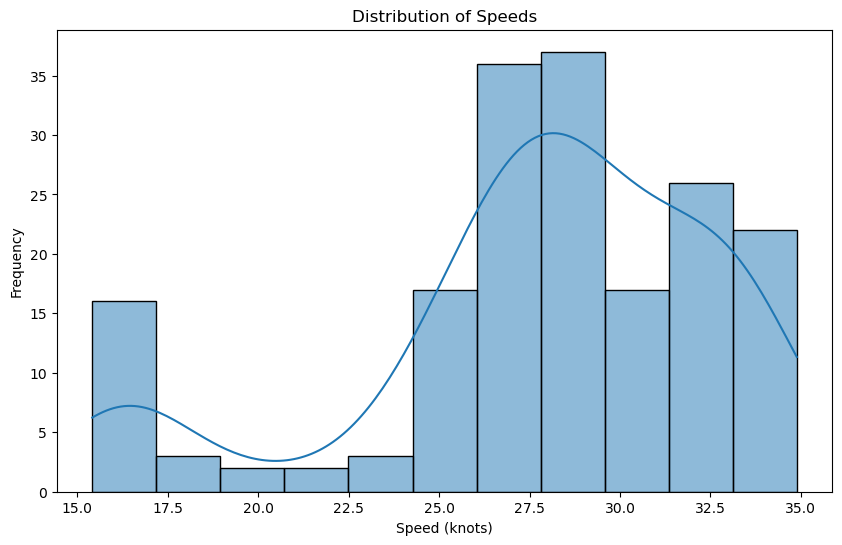

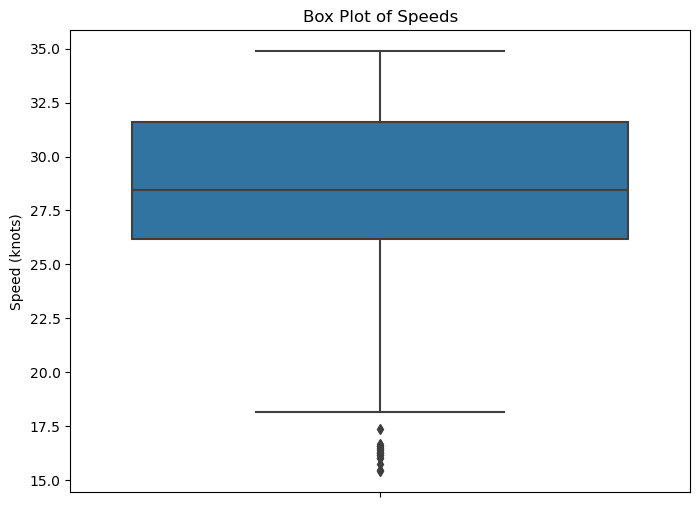

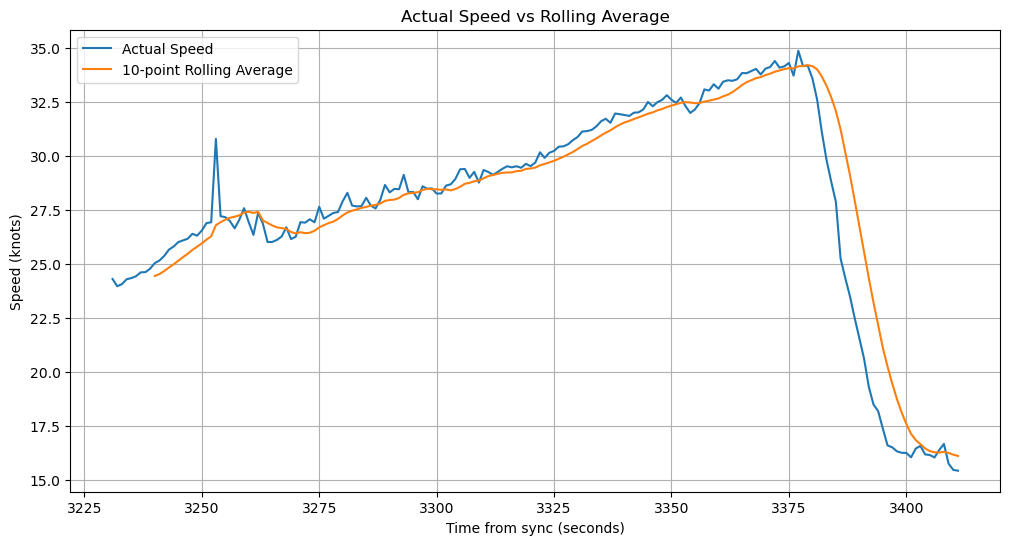

c:\Users\ben\.conda\envs\engd\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


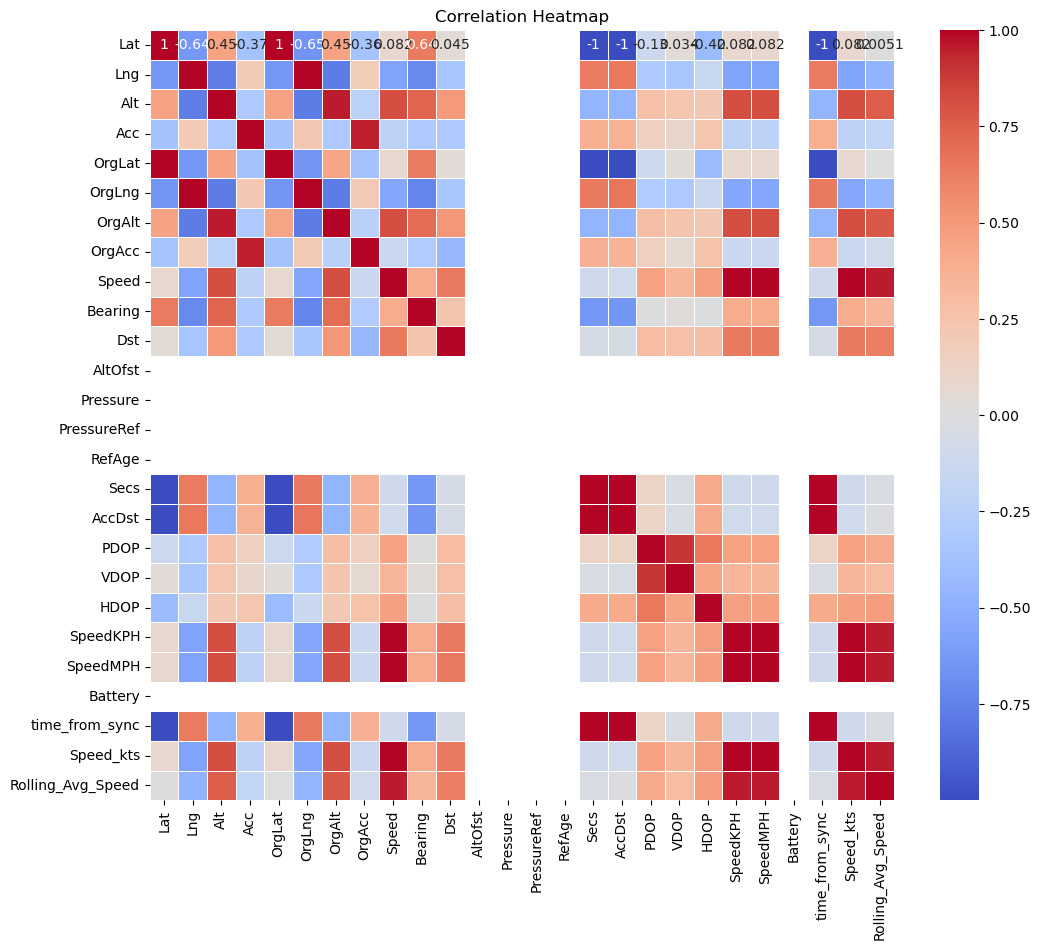

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('GPS_008_Into_wind_max_speed.csv')

# Convert 'time_from_sync' to numeric if it's not already
df['time_from_sync'] = pd.to_numeric(df['time_from_sync'])

# Convert SpeedKPH to knots
df['Speed_kts'] = df['SpeedKPH'] * 0.539957

# Basic statistics
print(df[['time_from_sync', 'Speed_kts']].describe())

# Create a line plot of speed over time
plt.figure(figsize=(12, 6))
plt.plot(df['time_from_sync'], df['Speed_kts'])
plt.title('Speed vs Time')
plt.xlabel('Time from sync (seconds)')
plt.ylabel('Speed (knots)')
plt.grid(True)
plt.show()

# Create a histogram of speeds
plt.figure(figsize=(10, 6))
sns.histplot(df['Speed_kts'], kde=True)
plt.title('Distribution of Speeds')
plt.xlabel('Speed (knots)')
plt.ylabel('Frequency')
plt.show()

# Create a box plot of speeds
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Speed_kts'])
plt.title('Box Plot of Speeds')
plt.ylabel('Speed (knots)')
plt.show()

# Calculate and plot rolling average speed
window_size = 10  # Adjust as needed
df['Rolling_Avg_Speed'] = df['Speed_kts'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['time_from_sync'], df['Speed_kts'], label='Actual Speed')
plt.plot(df['time_from_sync'], df['Rolling_Avg_Speed'], label=f'{window_size}-point Rolling Average')
plt.title('Actual Speed vs Rolling Average')
plt.xlabel('Time from sync (seconds)')
plt.ylabel('Speed (knots)')
plt.legend()
plt.grid(True)
plt.show()

# Correlation between speed and other numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Wind data collection

In [51]:
import urllib.request
import sys
import csv
import codecs

try:
    ResultBytes = urllib.request.urlopen("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/ryde/2023-12-12/2023-12-12?unitGroup=metric&include=hours&key=X6AMZKXBHL3FUX95XS8ABMH65&contentType=csv")
    
    # Parse the results as CSV
    CSVText = csv.reader(codecs.iterdecode(ResultBytes, 'utf-8'))
    
    # Save the CSV data to a file
    with open('weather_data.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        for row in CSVText:
            writer.writerow(row)
    
    print("Weather data has been saved to 'weather_data.csv'")
        
except urllib.error.HTTPError as e:
    ErrorInfo = e.read().decode() 
    print('Error code: ', e.code, ErrorInfo)
    sys.exit()
except urllib.error.URLError as e:
    ErrorInfo = e.read().decode() 
    print('Error code: ', e.code, ErrorInfo)
    sys.exit()

Weather data has been saved to 'weather_data.csv'


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('weather_data.csv')

# Convert datetime to pandas datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Set up the plot style
plt.style.use('default')
plt.figure(figsize=(20, 20))

# 1. Temperature, Feels Like, and Dew Point over time
plt.subplot(3, 2, 1)
plt.plot(df['datetime'], df['temp'], label='Temperature')
plt.plot(df['datetime'], df['feelslike'], label='Feels Like')
plt.plot(df['datetime'], df['dew'], label='Dew Point')
plt.title('Temperature, Feels Like, and Dew Point')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()

# 2. Humidity over time
plt.subplot(3, 2, 2)
plt.plot(df['datetime'], df['humidity'])
plt.title('Humidity over Time')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')

# 3. Precipitation and Precipitation Probability
plt.subplot(3, 2, 3)
plt.bar(df['datetime'], df['precip'], label='Precipitation')
plt.plot(df['datetime'], df['precipprob'], color='red', label='Precipitation Probability')
plt.title('Precipitation and Precipitation Probability')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm) / Probability (%)')
plt.legend()

# 4. Wind Speed and Gust
plt.subplot(3, 2, 4)
plt.plot(df['datetime'], df['windspeed'], label='Wind Speed')
plt.plot(df['datetime'], df['windgust'], label='Wind Gust')
plt.title('Wind Speed and Gust')
plt.xlabel('Time')
plt.ylabel('Speed (km/h)')
plt.legend()

# 5. Sea Level Pressure
plt.subplot(3, 2, 5)
plt.plot(df['datetime'], df['sealevelpressure'])
plt.title('Sea Level Pressure')
plt.xlabel('Time')
plt.ylabel('Pressure (hPa)')

# 6. Cloud Cover and Visibility
plt.subplot(3, 2, 6)
plt.plot(df['datetime'], df['cloudcover'], label='Cloud Cover')
plt.plot(df['datetime'], df['visibility'], label='Visibility')
plt.title('Cloud Cover and Visibility')
plt.xlabel('Time')
plt.ylabel('Percentage / km')
plt.legend()

plt.tight_layout()
plt.savefig('weather_exploration.png')
plt.close()

# Additional plot: Wind Direction
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")  # Set 0 degrees to point North
ax.set_theta_direction(-1)  # Make theta increase clockwise
theta = (df['winddir'] * np.pi / 180)
ax.scatter(theta, df['windspeed'])
plt.title('Wind Direction and Speed')
plt.savefig('wind_direction.png')
plt.close()

print("Exploratory plots have been saved as PNG files.")
print("Exploratory plots have been saved as PNG files.")

Exploratory plots have been saved as PNG files.
Exploratory plots have been saved as PNG files.
